In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
path ='C:/Users/dell/Downloads/Training_Datasets/'
file_paths = [path + fle for fle in os.listdir(path) if fle.endswith('xlsx')]
file_paths

['C:/Users/dell/Downloads/Training_Datasets/population_total.xlsx']

In [4]:
df=pd.read_csv("C:/Users/dell/Downloads/Training_Datasets/population_total.csv")

In [5]:
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


In [7]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [8]:
df['country'].value_counts()

Argentina             1
Montenegro            1
Bahamas               1
Syria                 1
Dominican Republic    1
                     ..
Oman                  1
Venezuela             1
Canada                1
Hong Kong, China      1
Guinea                1
Name: country, Length: 197, dtype: int64

In [9]:
df.dtypes

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

In [10]:
df.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


In [19]:
# Function to convert population values to float
def convert_population(value):
    if isinstance(value, float) or isinstance(value, int):
        return value
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3
    else:
        return float(value)

In [20]:
# Apply the conversion function to all population columns
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: convert_population(x))

# General Statistics
print("General Statistics")
print(df.describe())

General Statistics
               1800          1801          1802          1803          1804  \
count  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02   
mean   4.997231e+06  5.014695e+06  5.033275e+06  5.050528e+06  5.063379e+06   
std    2.766040e+07  2.778250e+07  2.788112e+07  2.800319e+07  2.806563e+07   
min    9.050000e+02  9.050000e+02  9.050000e+02  9.050000e+02  9.050000e+02   
25%    1.270000e+05  1.270000e+05  1.270000e+05  1.270000e+05  1.270000e+05   
50%    6.370000e+05  6.370000e+05  6.370000e+05  6.370000e+05  6.370000e+05   
75%    2.150000e+06  2.150000e+06  2.150000e+06  2.150000e+06  2.150000e+06   
max    3.300000e+08  3.320000e+08  3.330000e+08  3.350000e+08  3.360000e+08   

               1805          1806          1807          1808          1809  \
count  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02   
mean   5.086794e+06  5.101449e+06  5.125114e+06  5.143903e+06  5.157342e+06   
std    2.822413e+07  2.828737e+0

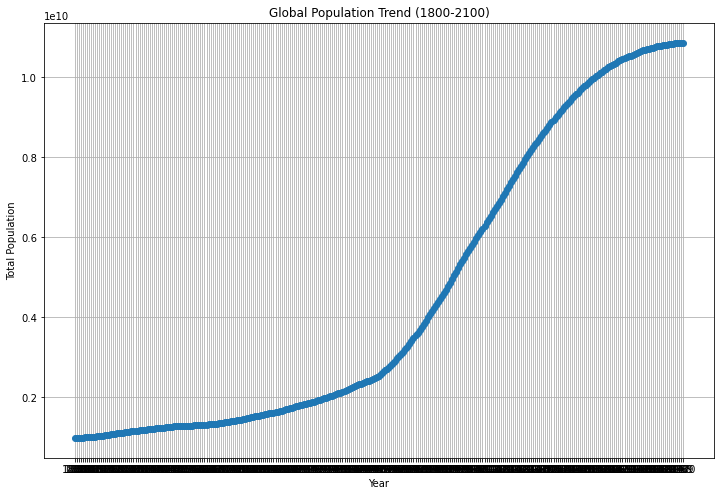

In [25]:
# Trend Analysis: Overall population trends
years = df.columns[1:]
total_population = df[years].sum()

plt.figure(figsize=(12, 8))
plt.plot(years, total_population, marker='o')
plt.title('Global Population Trend (1800-2100)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

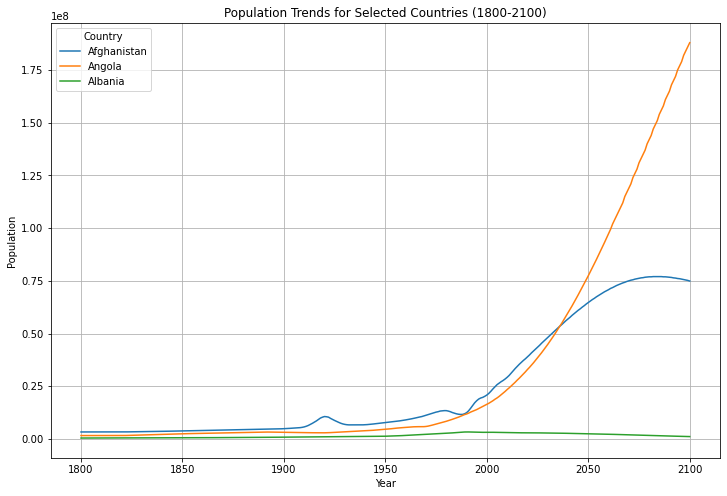

In [26]:
# Comparative Analysis: Population trends for selected countries
countries_to_plot = ['Afghanistan', 'Angola', 'Albania']
df.set_index('country').loc[countries_to_plot].T.plot(figsize=(12, 8))
plt.title('Population Trends for Selected Countries (1800-2100)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [27]:
# Growth Rate Analysis: Calculate annual growth rates for each country
df_growth = df.copy()
for col in df.columns[2:]:
    prev_col = df.columns[df.columns.get_loc(col) - 1]
    df_growth[col] = (df[col] - df[prev_col]) / df[prev_col] * 100


In [28]:
# Average annual growth rate per country
avg_growth_rates = df_growth.iloc[:, 2:].mean(axis=1)
df['Average Growth Rate (%)'] = avg_growth_rates

In [29]:
# Top 5 countries by average growth rate
top_growth_countries = df[['country', 'Average Growth Rate (%)']].sort_values(by='Average Growth Rate (%)', ascending=False).head(5)
print("Top 5 Countries by Average Growth Rate")
print(top_growth_countries)


Top 5 Countries by Average Growth Rate
                  country  Average Growth Rate (%)
72       Hong Kong, China                 2.030359
4    United Arab Emirates                 2.013713
147                 Qatar                 1.969518
8               Australia                 1.815522
127                 Niger                 1.778227


In [30]:
# Bottom 5 countries by average growth rate
bottom_growth_countries = df[['country', 'Average Growth Rate (%)']].sort_values(by='Average Growth Rate (%)').head(5)
print("Bottom 5 Countries by Average Growth Rate")
print(bottom_growth_countries)

Bottom 5 Countries by Average Growth Rate
             country  Average Growth Rate (%)
74          Holy See                -0.038196
80           Ireland                 0.032278
16          Bulgaria                 0.159712
75           Croatia                 0.193811
164  Slovak Republic                 0.195625


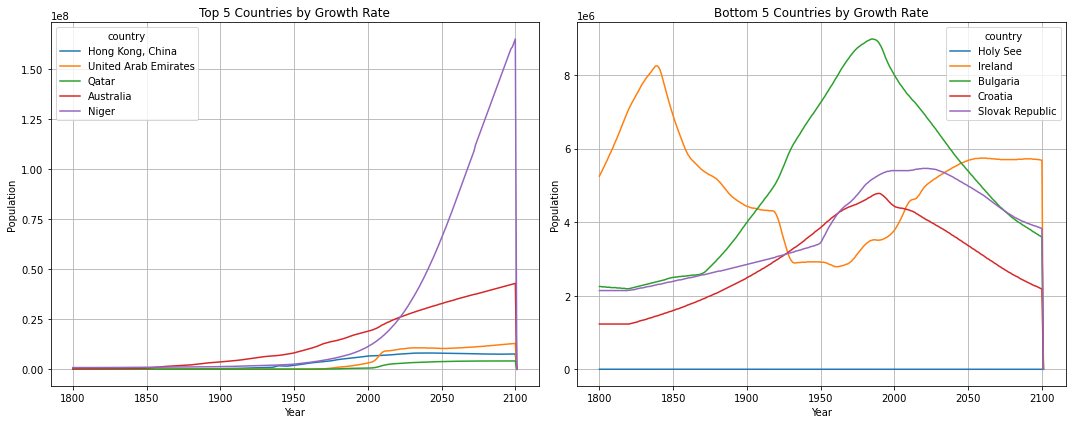

In [32]:
# Plotting top and bottom growth rate countries
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

top_countries_to_plot = top_growth_countries['country'].values
bottom_countries_to_plot = bottom_growth_countries['country'].values

df.set_index('country').loc[top_countries_to_plot].T.plot(ax=ax[0])
ax[0].set_title('Top 5 Countries by Growth Rate')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Population')
ax[0].grid(True)

df.set_index('country').loc[bottom_countries_to_plot].T.plot(ax=ax[1])
ax[1].set_title('Bottom 5 Countries by Growth Rate')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Population')
ax[1].grid(True)

plt.tight_layout()
plt.show()